# Modelation of ML models for Classification

In [6]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [7]:
train_dataset = pd.read_csv('data/train_dataset.csv')
test_dataset = pd.read_csv('data/test_dataset.csv')
val_dataset = pd.read_csv('data/val_dataset.csv')

In [8]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4339 entries, 0 to 4338
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  4339 non-null   int64  
 1   Age                         4339 non-null   int64  
 2   AnnualIncome                4339 non-null   int64  
 3   CreditScore                 4339 non-null   int64  
 4   EmploymentStatus            4339 non-null   int64  
 5   EducationLevel              4339 non-null   int64  
 6   Experience                  4339 non-null   int64  
 7   LoanAmount                  4339 non-null   int64  
 8   LoanDuration                4339 non-null   int64  
 9   MaritalStatus               4339 non-null   int64  
 10  NumberOfDependents          4339 non-null   int64  
 11  HomeOwnershipStatus         4339 non-null   int64  
 12  MonthlyDebtPayments         4339 non-null   int64  
 13  CreditCardUtilizationRate   4339 

In [9]:
train_dataset.drop(columns=['Unnamed: 0','EmploymentStatus', 'MaritalStatus', 'NumberOfDependents',
 'CreditCardUtilizationRate', 'DebtToIncomeRatio', 'CheckingAccountBalance',
 'JobTenure','RiskScore'], inplace=True)

In [10]:
scaler = MinMaxScaler()
scaler.fit(train_dataset.drop(columns='LoanApproved'))

X_train = scaler.transform(train_dataset.drop(columns='LoanApproved'))
Y_train = train_dataset['LoanApproved']


## Model & predictions

In [11]:
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

In [12]:
Y_predicted = model.predict(X_train)

### The Evaluation metrics in the trainee

In [13]:
accuracy = accuracy_score(Y_train, Y_predicted)
conf_matrix = confusion_matrix(Y_train, Y_predicted)
class_report = classification_report(Y_train, Y_predicted)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix: \n {conf_matrix}')
print(f'Classification Report: \n {class_report}')


Accuracy: 0.9430744411154643
Confusion Matrix: 
 [[3219   85]
 [ 162  873]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.97      0.96      3304
           1       0.91      0.84      0.88      1035

    accuracy                           0.94      4339
   macro avg       0.93      0.91      0.92      4339
weighted avg       0.94      0.94      0.94      4339



### The evaluation metrics in test

In [14]:
X_test = scaler.transform(test_dataset.drop(columns=['LoanApproved', 'Unnamed: 0','EmploymentStatus', 'MaritalStatus', 'NumberOfDependents',
 'CreditCardUtilizationRate', 'DebtToIncomeRatio', 'CheckingAccountBalance',
 'JobTenure', 'RiskScore']))
Y_test = test_dataset['LoanApproved']

Y_predicted_test = model.predict(X_test)

accuracy = accuracy_score(Y_test, Y_predicted_test)
conf_matrix = confusion_matrix(Y_test, Y_predicted_test)
class_report = classification_report(Y_test, Y_predicted_test)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix: \n {conf_matrix}')
print(f'Classification Report: \n {class_report}')



Accuracy: 0.9427254772876893
Confusion Matrix: 
 [[2258   49]
 [ 125  606]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.98      0.96      2307
           1       0.93      0.83      0.87       731

    accuracy                           0.94      3038
   macro avg       0.94      0.90      0.92      3038
weighted avg       0.94      0.94      0.94      3038



In [18]:
test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3038 entries, 0 to 3037
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  3038 non-null   int64  
 1   Age                         3038 non-null   int64  
 2   AnnualIncome                3038 non-null   int64  
 3   CreditScore                 3038 non-null   int64  
 4   EmploymentStatus            3038 non-null   int64  
 5   EducationLevel              3038 non-null   int64  
 6   Experience                  3038 non-null   int64  
 7   LoanAmount                  3038 non-null   int64  
 8   LoanDuration                3038 non-null   int64  
 9   MaritalStatus               3038 non-null   int64  
 10  NumberOfDependents          3038 non-null   int64  
 11  HomeOwnershipStatus         3038 non-null   int64  
 12  MonthlyDebtPayments         3038 non-null   int64  
 13  CreditCardUtilizationRate   3038 

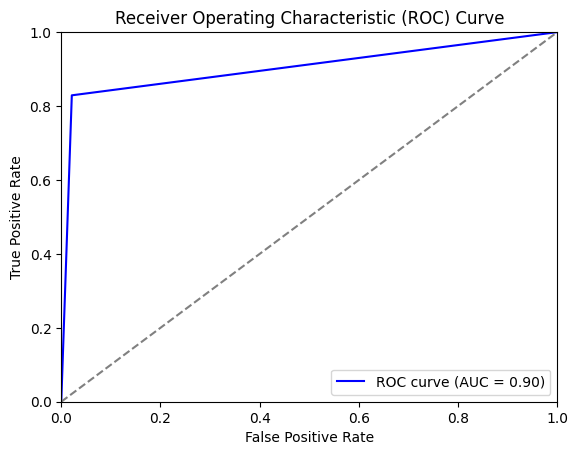

In [15]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

y_prob = model.predict_proba(X_test)[:, 1]  # Probabilidades predichas para la clase positiva
fpr, tpr, _ = roc_curve(Y_test, Y_predicted_test)     # Calcular la curva ROC
auc = roc_auc_score(Y_test, Y_predicted_test)         # Calcular el AUC
plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


### Saving Model

In [16]:
import joblib

joblib.dump(model, 'models/Classification/model_99precision.pkl')
joblib.dump(scaler, 'models/Classification/model_99precision_scaler.pkl')

['models/Classification/model_99precision_scaler.pkl']